# Libs

In [1]:
import pandas as pd
import uuid
import matplotlib.pyplot as plt

## Load Data

In [2]:
# Load the raw data from a CSV file
raw_data = pd.read_csv('../Data/Input/CrimeData.csv', sep=';')

In [3]:
raw_data.head(5)

,CaseID,DateOccured,AreaCode,Area,CrimeCode,CrimeDescription,VictimAge,VictimSex,VictimDescentCode,VictimDescent,PremisCode,PremisDescription,WeaponCode,Weapon,CaseStatusCode,CaseStatusDescription,latitude,longitude
0,191501505,2020-01-01,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,White,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0,UNKNOWN,IC,Invest Cont,34.1685,-118.4019
1,191921269,2020-01-01,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,Unknown,409,BEAUTY SUPPLY STORE,0,UNKNOWN,IC,Invest Cont,34.2198,-118.4468
2,200100501,2020-01-01,1,Central,121,"RAPE, FORCIBLE",25,F,H,Hispanic-Latin-Mexican,735,NIGHT CLUB (OPEN EVENINGS ONLY),500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0452,-118.2534
3,200100502,2020-01-02,1,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,H,Hispanic-Latin-Mexican,404,DEPARTMENT STORE,0,UNKNOWN,IC,Invest Cont,34.0483,-118.2631
4,200100504,2020-01-04,1,Central,946,OTHER MISCELLANEOUS CRIME,0,X,X,Unknown,726,POLICE FACILITY,0,UNKNOWN,IC,Invest Cont,34.0448,-118.2474


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246416 entries, 0 to 246415
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CaseID                 246416 non-null  int64  
 1   DateOccured            246416 non-null  object 
 2   AreaCode               246416 non-null  int64  
 3   Area                   246416 non-null  object 
 4   CrimeCode              246416 non-null  int64  
 5   CrimeDescription       246416 non-null  object 
 6   VictimAge              246416 non-null  int64  
 7   VictimSex              246416 non-null  object 
 8   VictimDescentCode      246416 non-null  object 
 9   VictimDescent          246416 non-null  object 
 10  PremisCode             246416 non-null  int64  
 11  PremisDescription      246251 non-null  object 
 12  WeaponCode             246416 non-null  int64  
 13  Weapon                 246416 non-null  object 
 14  CaseStatusCode         246416 non-nu

Checking for multiple entries for the same case ID

In [5]:
raw_data['CaseID'].nunique()

246416

# Numeric Codes

The columns AreaCode, CrimeCode, PremisCode, and WeaponCode contain numeric codes that represent different categories. Below is an analysis of the distribution of these codes in the dataset.

## Area Code

A distribution of the different area codes in the dataset.

In [6]:
raw_data['AreaCode'].nunique()

21

In [7]:
raw_data['AreaCode'].unique()

array([15, 19,  1,  9, 10,  7,  2,  3,  4,  8, 16,  6, 20,  5, 12, 18, 14,
       21, 17, 11, 13])

In [8]:
raw_data['AreaCode'].value_counts().head(10)

AreaCode
1     16951
12    15592
3     14019
14    13352
20    12992
18    12695
6     12578
7     12326
13    12169
2     11818
Name: count, dtype: int64

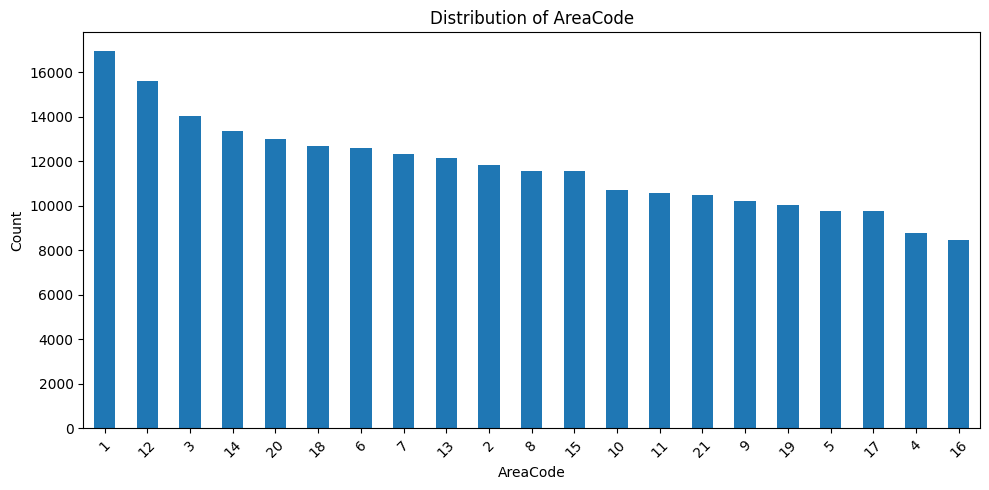

In [9]:
# Value counts
counts = raw_data['AreaCode'].value_counts()

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of AreaCode")
plt.xlabel("AreaCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crime Code

A distribution of the different crime codes in the dataset.

In [10]:
raw_data['CrimeCode'].nunique()

134

In [11]:
raw_data['CrimeCode'].unique()

array([745, 740, 121, 442, 946, 341, 330, 930, 354, 761, 845, 350, 626,
       310, 860, 230, 236, 623, 440, 624, 210, 888, 420, 421, 647, 940,
       480, 810, 662, 220, 649, 901, 815, 900, 890, 956, 755, 753, 331,
       812, 886, 666, 850, 410, 320, 510, 625, 928, 932, 903, 250, 343,
       813, 664, 251, 668, 110, 433, 437, 821, 443, 910, 922, 627, 921,
       235, 352, 648, 822, 902, 441, 762, 661, 820, 651, 237, 520, 920,
       231, 654, 943, 439, 805, 763, 122, 351, 434, 933, 806, 438, 951,
       950, 954, 670, 622, 840, 522, 353, 949, 450, 814, 660, 904, 445,
       653, 473, 471, 436, 347, 345, 931, 760, 435, 944, 756, 880, 870,
       470, 444, 882, 446, 474, 652, 452, 865, 475, 485, 451, 113, 830,
       948, 924, 942, 432])

In [12]:
raw_data['CrimeCode'].value_counts().head(10)

CrimeCode
354    26647
624    21760
740    16554
330    16355
310    16256
230    15593
440    13953
626    13732
331     9644
210     9003
Name: count, dtype: int64

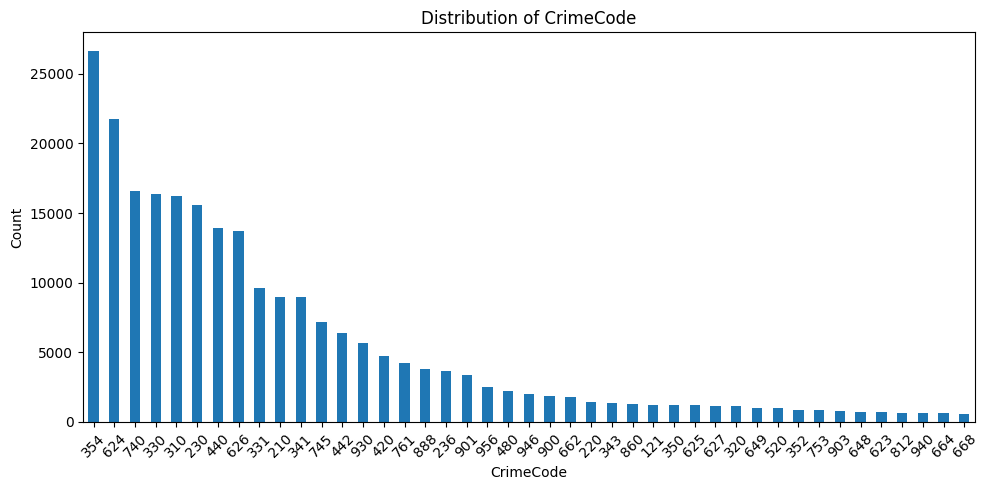

In [13]:
# Value counts
counts = raw_data['CrimeCode'].value_counts()

# keep only values with count > 500
counts = counts[counts > 500]

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of CrimeCode")
plt.xlabel("CrimeCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Premis Code

A distribution of the different premises in the dataset.

In [14]:
raw_data['PremisCode'].nunique()

298

In [15]:
raw_data['PremisCode'].unique()

array([502, 409, 735, 404, 726, 101, 108, 503, 252, 507, 203, 122, 102,
       900, 501, 902, 210, 403, 517, 707, 834, 123, 753, 710, 248, 405,
       602, 801, 118, 719, 903, 202, 244, 744, 701, 733, 406, 738, 741,
       725, 516, 402, 155, 119, 116, 103, 109, 221, 723, 104, 504, 110,
       121, 117, 702, 705, 908, 505, 301, 242, 510, 201, 218, 704, 158,
       256, 751, 217, 727, 509, 124, 722, 255, 804, 222, 120, 401, 717,
       750, 232, 145, 233, 243, 605, 410, 518, 212, 129, 213, 721, 506,
       870, 211, 519, 412, 515, 958, 911, 247, 207, 140, 720, 909, 716,
       251, 511, 408, 968, 835, 946, 514, 708, 220, 906, 904, 146, 231,
       219, 803, 802, 754, 901, 715, 235, 135, 114, 603, 142, 954, 416,
       752, 950, 810, 106, 418, 111, 740, 206, 932, 730, 216, 947, 508,
       897, 415, 254, 966, 729, 107, 512, 910, 736, 229, 205, 147, 127,
       149, 208, 931, 917, 152, 944, 921, 249, 714, 948, 215, 154, 809,
       915, 713, 728, 877, 413, 936, 407, 905, 712, 417, 913, 14

In [16]:
raw_data['PremisCode'].value_counts().head(10)

PremisCode
501    51387
101    41422
502    36571
108    14096
203    12165
102    11660
122     8052
707     4087
210     3446
104     3235
Name: count, dtype: int64

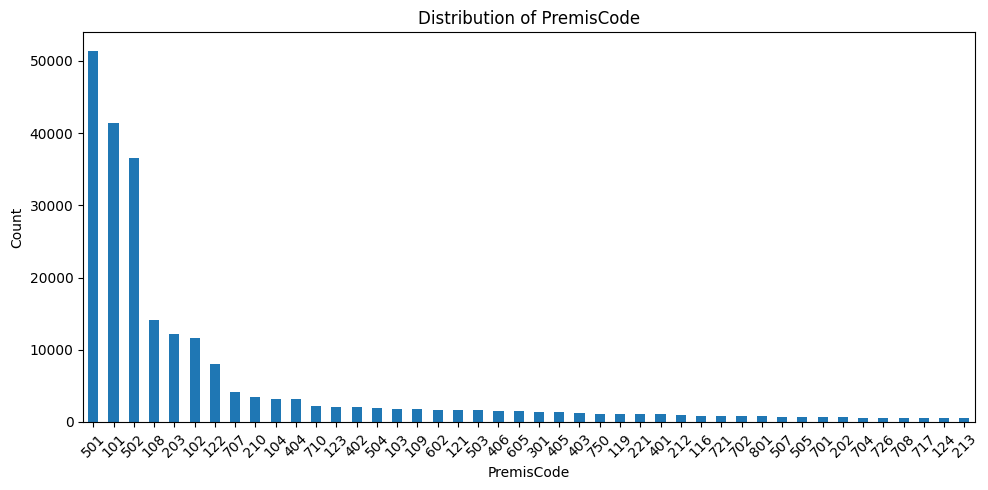

In [17]:
# Value counts
counts = raw_data['PremisCode'].value_counts()

# keep only values with count > 500
counts = counts[counts > 500]

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of PremisCode")
plt.xlabel("PremisCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weapon Code

A distribution of the different weapon codes in the dataset.

In [18]:
raw_data['WeaponCode'].nunique()

77

In [19]:
raw_data['WeaponCode'].unique()

array([  0, 500, 306, 511, 109, 400, 218, 207, 215, 216, 104, 200, 106,
       102, 501, 304, 107, 204, 211, 213, 101, 512, 302, 201, 515, 205,
       312, 203, 308, 311, 219, 212, 114, 307, 221, 310, 113, 506, 115,
       223, 301, 305, 514, 303, 503, 509, 121, 103, 513, 112, 502, 505,
       309, 111, 507, 208, 214, 206, 209, 516, 105, 510, 217, 300, 504,
       118, 110, 202, 108, 122, 210, 116, 220, 119, 117, 508, 125])

In [20]:
raw_data['WeaponCode'].value_counts().head(10)

WeaponCode
0      151252
400     51165
500     10049
511      7103
102      5868
109      2187
106      1939
200      1868
207      1699
512      1083
Name: count, dtype: int64

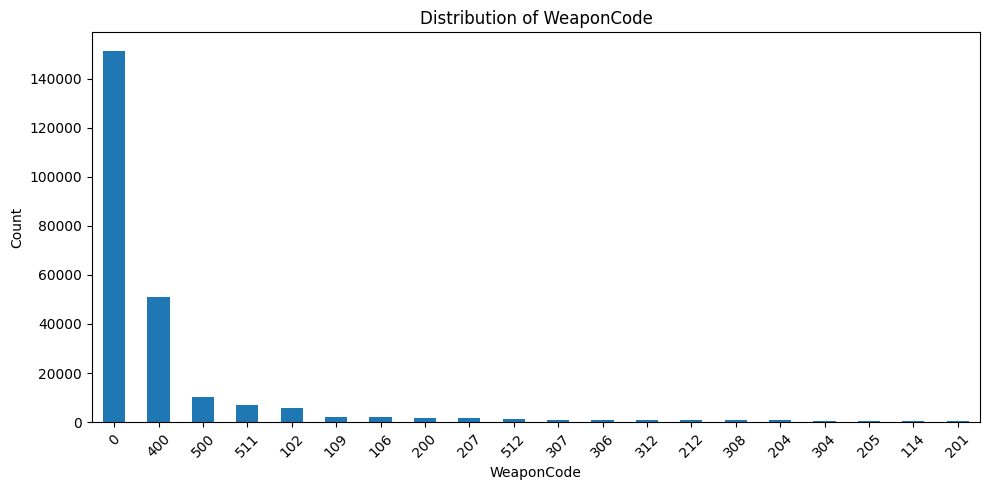

In [21]:
# Value counts
counts = raw_data['WeaponCode'].value_counts()

# keep only values with count > 500
counts = counts[counts > 500]

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of WeaponCode")
plt.xlabel("WeaponCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Character Codes

The columns CaseStatus and VictimDescentCode contain character codes that represent different categories. Below is an analysis of the distribution of these codes in the dataset.

## Case Status Code

A distribution of the different case status codes in the dataset.

In [22]:
raw_data['CaseStatusCode'].nunique()

6

In [23]:
raw_data['CaseStatusCode'].unique()

array(['IC', 'AA', 'AO', 'JO', 'JA', 'CC'], dtype=object)

In [24]:
raw_data['CaseStatusCode'].value_counts().head(10)

CaseStatusCode
IC    193154
AO     29240
AA     22689
JA       841
JO       490
CC         2
Name: count, dtype: int64

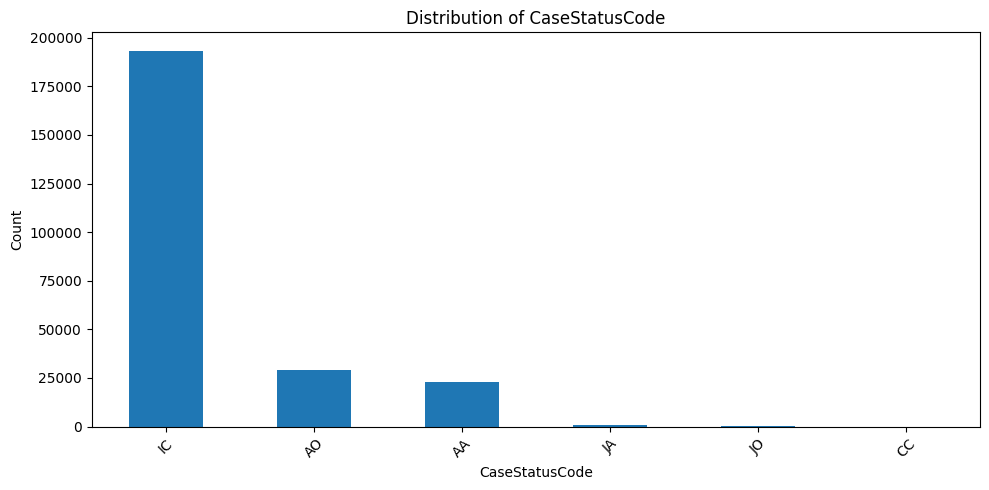

In [25]:
# Value counts
counts = raw_data['CaseStatusCode'].value_counts()

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of CaseStatusCode")
plt.xlabel("CaseStatusCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Victim Descent Code

In [26]:
raw_data['VictimDescentCode'].nunique()

19

In [27]:
raw_data['VictimDescentCode'].unique()

array(['W', 'X', 'H', 'B', 'A', 'O', 'C', 'F', 'K', 'I', 'V', 'J', 'P',
       'D', 'Z', 'S', 'U', 'L', 'G'], dtype=object)

In [28]:
raw_data['VictimDescentCode'].value_counts().head(10)

VictimDescentCode
H    88424
W    56553
B    41935
X    26015
O    22164
A     6049
K     1621
F     1232
C     1088
J      395
Name: count, dtype: int64

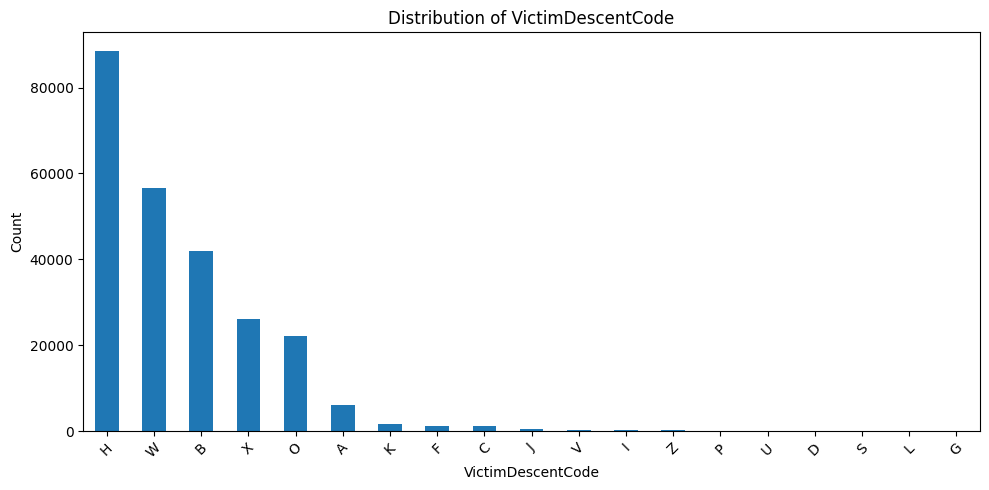

In [29]:
# Value counts
counts = raw_data['VictimDescentCode'].value_counts()

plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("Distribution of VictimDescentCode")
plt.xlabel("VictimDescentCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-----------
# Data Schema Proposal
A proposed schema for the cleaned dataset based on the analysis above.


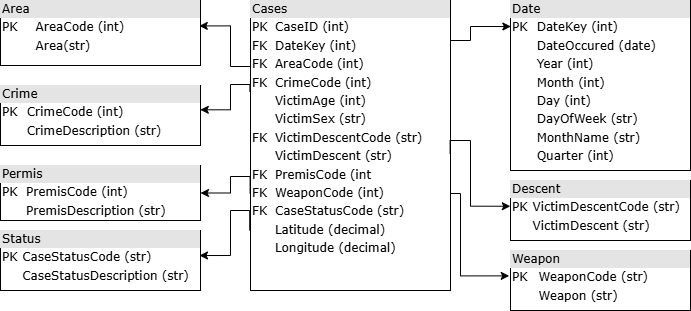


# Proposed Star Schema Design

This project utilizes a **Star Schema** architecture to organize the crime data efficiently for analysis. This design separates quantitative transactional data (facts) from descriptive attributes (dimensions), improving query performance and data integrity.

## Schema Components
### 1. Fact Table: `Cases`
The central table representing individual crime incidents.
*   **Primary Key**: `CaseID` (int)
*   **Foreign Keys**:
    *   `DateKey` (int) -> Links to `Date` dimension
    *   `AreaCode` (int) -> Links to `Area` dimension
    *   `CrimeCode` (int) -> Links to `Crime` dimension
    *   `VictimDescentCode` (str) -> Links to `Descent` dimension
    *   `PremisCode` (int) -> Links to `Permis` dimension
    *   `WeaponCode` (int) -> Links to `Weapon` dimension
    *   `CaseStatusCode` (str) -> Links to `Status` dimension
*   **Attributes**:
    *   `VictimAge` (int)
    *   `VictimSex` (str)
    *   `VictimDescent` (str)
    *   `Latitude` (decimal)
    *   `Longitude` (decimal)

### 2. Dimension Tables

#### Area
Captures geographical context.
*   **PK**: `AreaCode` (int)
*   **Attributes**: `Area` (str)

#### Crime
Details the specific nature of the offense.
*   **PK**: `CrimeCode` (int)
*   **Attributes**: `CrimeDescription` (str)

#### Premis
Stores information about the location type of the crime.
*   **PK**: `PremisCode` (int)
*   **Attributes**: `PremisDescription` (str)

#### Status
Provides status updates on case progress.
*   **PK**: `CaseStatusCode` (str)
*   **Attributes**: `CaseStatusDescription` (str)

#### Descent
Captures victim demographic information.
*   **PK**: `VictimDescentCode` (date)
*   **Attributes**: `VictimDescent` (str)


#### Weapon
Details about weapons involved in crimes.
    *   **PK**: `WeaponCode` (str)
    *   **Attributes**: `Weapon` (str)

#### Date
A time dimension for temporal analysis.
*   **PK**: `DateOccured` (date)
*   **Attributes**:
    *   `Year` (int)
    *   `Month` (str)
    *   `Day` (str)
    *   `DayOfWeek` (str)
    *   `MonthName` (str)
    *   `Quarter` (int)

---
*This structure minimizes data redundancy by storing repetitive text (like Area names or Crime descriptions) once in dimension tables, while keeping the main `Cases` table lean.*
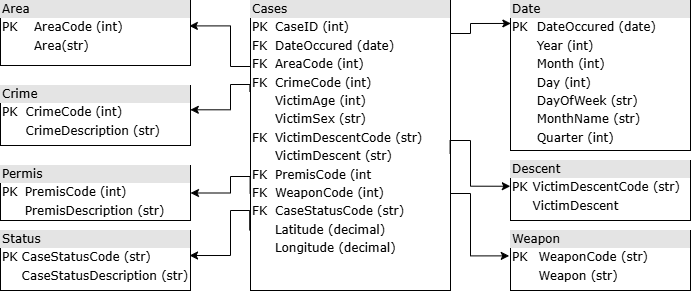

## 1. Date Dimension
Extract unique dates and derive attributes

In [30]:
date_df = raw_data[['DateOccured']].drop_duplicates().copy()
date_df['DateOccured'] = pd.to_datetime(date_df['DateOccured'])
date_df['DateKey'] = date_df['DateOccured'].dt.strftime('%Y%m%d').astype(int)
date_df['Year'] = date_df['DateOccured'].dt.year
date_df['Month'] = date_df['DateOccured'].dt.month
date_df['Day'] = date_df['DateOccured'].dt.day
date_df['DayOfWeek'] = date_df['DateOccured'].dt.day_name()
date_df['MonthName'] = date_df['DateOccured'].dt.month_name()
date_df['Quarter'] = date_df['DateOccured'].dt.quarter
date_df = date_df.reset_index(drop=True)

In [31]:
date_df.head(5)

,DateOccured,DateKey,Year,Month,Day,DayOfWeek,MonthName,Quarter
0,2020-01-01,20200101,2020,1,1,Wednesday,January,1
1,2020-01-02,20200102,2020,1,2,Thursday,January,1
2,2020-01-04,20200104,2020,1,4,Saturday,January,1
3,2020-01-05,20200105,2020,1,5,Sunday,January,1
4,2020-01-08,20200108,2020,1,8,Wednesday,January,1


## 2. Area Dimension
Extract unique location combinations

In [32]:
location_cols = ['AreaCode', 'Area']
location_df = raw_data[location_cols].drop_duplicates().reset_index(drop=True)

In [33]:
location_df.head(5)

,AreaCode,Area
0,15,N Hollywood
1,19,Mission
2,1,Central
3,9,Van Nuys
4,10,West Valley


## 3. Crime Dimension
Extract unique crime combinations

In [34]:
crime_cols = ['CrimeCode', 'CrimeDescription']
crime_df = raw_data[crime_cols].drop_duplicates().reset_index(drop=True)

In [35]:
crime_df.head(5)

,CrimeCode,CrimeDescription
0,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
1,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
2,121,"RAPE, FORCIBLE"
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4,946,OTHER MISCELLANEOUS CRIME


## 4. Premis Dimension
Extract unique premis combinations

In [36]:
premis_cols = ['PremisCode', 'PremisDescription']
premis_df = raw_data[premis_cols].drop_duplicates().reset_index(drop=True)

In [37]:
premis_df.head(5)

,PremisCode,PremisDescription
0,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
1,409,BEAUTY SUPPLY STORE
2,735,NIGHT CLUB (OPEN EVENINGS ONLY)
3,404,DEPARTMENT STORE
4,726,POLICE FACILITY


## 5. Status Dimension
Extract unique status combinations

In [38]:
status_cols = ['CaseStatusCode', 'CaseStatusDescription']
status_df = raw_data[status_cols].drop_duplicates().reset_index(drop=True)

In [39]:
status_df.head(5)

,CaseStatusCode,CaseStatusDescription
0,IC,Invest Cont
1,AA,Adult Arrest
2,AO,Adult Other
3,JO,Juv Other
4,JA,Juv Arrest


## 6. Weapon Dimension
Extract unique weapon combinations

In [40]:
weapon_cols = ['WeaponCode', 'Weapon']
weapon_df = raw_data[weapon_cols].drop_duplicates().reset_index(drop=True)

In [41]:
weapon_df.head(5)

,WeaponCode,Weapon
0,0,UNKNOWN
1,500,UNKNOWN WEAPON/OTHER WEAPON
2,306,ROCK/THROWN OBJECT
3,511,VERBAL THREAT
4,109,SEMI-AUTOMATIC PISTOL


## 7. Descent Dimension
Extract unique descent combinations

In [42]:
descent_cols = ['VictimDescentCode', 'VictimDescent']
descent_df = raw_data[descent_cols].drop_duplicates().reset_index(drop=True)

In [43]:
descent_df.head(5)

,VictimDescentCode,VictimDescent
0,W,White
1,X,Unknown
2,H,Hispanic-Latin-Mexican
3,B,Black
4,A,Other Asian


## 6. Cases Table (Fact Table)
Merge raw data with dimension tables to get the surrogate keys

In [48]:
raw_data['DateOccured'] = pd.to_datetime(raw_data['DateOccured'])
raw_data['DateKey'] = raw_data['DateOccured'].dt.strftime('%Y%m%d').astype(int)

cased_cols = [
    'CaseID', 'DateKey', 'AreaCode', 'CrimeCode', 'VictimAge',
    'VictimSex', 'VictimDescentCode', 'PremisCode', 'WeaponCode',
    'CaseStatusCode', 'latitude', 'longitude'
]
cases_df = raw_data[cased_cols].copy()

In [49]:
cases_df.head(5)

,CaseID,DateKey,AreaCode,CrimeCode,VictimAge,VictimSex,VictimDescentCode,PremisCode,WeaponCode,CaseStatusCode,latitude,longitude
0,191501505,20200101,15,745,76,F,W,502,0,IC,34.1685,-118.4019
1,191921269,20200101,19,740,31,X,X,409,0,IC,34.2198,-118.4468
2,200100501,20200101,1,121,25,F,H,735,500,IC,34.0452,-118.2534
3,200100502,20200102,1,442,23,M,H,404,0,IC,34.0483,-118.2631
4,200100504,20200104,1,946,0,X,X,726,0,IC,34.0448,-118.2474
